# McDonalds Menu Analysis

## Introduction

A customer finding themselves at McDonalds may adopt one of these two common strategies. 1) they are there to splurge and enjoy a meal, 2) they had limited options and may try to order the "healthiest" option. 
We will follow a person pursuing the healthy alternative.

The preference of our eater is for a hot meal.  They are thinking that the breakfast items, chicken, or fish sandwiches would be the healthier choice.





In [169]:
import opendatasets as od
import numpy as np 
import pandas as pd 
import seaborn as sns
import os
# get data

mc_data = pd.read_csv (r'C:\Users\ckitc\OneDrive\Documents\learning\springboard_2\menu.csv')
#print (mc_data)

In [170]:
mc_data.head(3)

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10


In [171]:
#check for missing

print(mc_data.isnull().sum())


Category                         0
Item                             0
Serving Size                     0
Calories                         0
Calories from Fat                0
Total Fat                        0
Total Fat (% Daily Value)        0
Saturated Fat                    0
Saturated Fat (% Daily Value)    0
Trans Fat                        0
Cholesterol                      0
Cholesterol (% Daily Value)      0
Sodium                           0
Sodium (% Daily Value)           0
Carbohydrates                    0
Carbohydrates (% Daily Value)    0
Dietary Fiber                    0
Dietary Fiber (% Daily Value)    0
Sugars                           0
Protein                          0
Vitamin A (% Daily Value)        0
Vitamin C (% Daily Value)        0
Calcium (% Daily Value)          0
Iron (% Daily Value)             0
dtype: int64


In [172]:
#Get column names check types
mc_data.dtypes

Category                          object
Item                              object
Serving Size                      object
Calories                           int64
Calories from Fat                  int64
Total Fat                        float64
Total Fat (% Daily Value)          int64
Saturated Fat                    float64
Saturated Fat (% Daily Value)      int64
Trans Fat                        float64
Cholesterol                        int64
Cholesterol (% Daily Value)        int64
Sodium                             int64
Sodium (% Daily Value)             int64
Carbohydrates                      int64
Carbohydrates (% Daily Value)      int64
Dietary Fiber                      int64
Dietary Fiber (% Daily Value)      int64
Sugars                             int64
Protein                            int64
Vitamin A (% Daily Value)          int64
Vitamin C (% Daily Value)          int64
Calcium (% Daily Value)            int64
Iron (% Daily Value)               int64
dtype: object

In [173]:
## Subset columns

print(list(mc_data.columns))



['Category', 'Item', 'Serving Size', 'Calories', 'Calories from Fat', 'Total Fat', 'Total Fat (% Daily Value)', 'Saturated Fat', 'Saturated Fat (% Daily Value)', 'Trans Fat', 'Cholesterol', 'Cholesterol (% Daily Value)', 'Sodium', 'Sodium (% Daily Value)', 'Carbohydrates', 'Carbohydrates (% Daily Value)', 'Dietary Fiber', 'Dietary Fiber (% Daily Value)', 'Sugars', 'Protein', 'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)', 'Calcium (% Daily Value)', 'Iron (% Daily Value)']


In [174]:
# subset columns of interest

#columns of interest
cols_to_subset=['Category', 'Item', 'Serving Size', 'Calories', 'Calories from Fat', 'Total Fat', 'Trans Fat', 'Cholesterol','Sodium',
     'Carbohydrates',  'Dietary Fiber',  'Sugars', 'Protein'
     ]

#select
mc_data = pd.DataFrame(mc_data, columns=cols_to_subset)

#extract ounces, convert to numerics
mc_data['serving_size_ounces']=mc_data['Serving Size'].str.replace('[^\d\.]','', regex=True).astype(float)
mc_data=mc_data.drop(['Serving Size'], axis = 1)

#view head
mc_data.head(4)




,Category,Item,Calories,Calories from Fat,Total Fat,Trans Fat,Cholesterol,Sodium,Carbohydrates,Dietary Fiber,Sugars,Protein,serving_size_ounces
0,Breakfast,Egg McMuffin,300,120,13.0,0.0,260,750,31,4,3,17,4.8136
1,Breakfast,Egg White Delight,250,70,8.0,0.0,25,770,30,4,3,18,4.8135
2,Breakfast,Sausage McMuffin,370,200,23.0,0.0,45,780,29,4,2,14,3.9111
3,Breakfast,Sausage McMuffin with Egg,450,250,28.0,0.0,285,860,30,4,2,21,5.7161


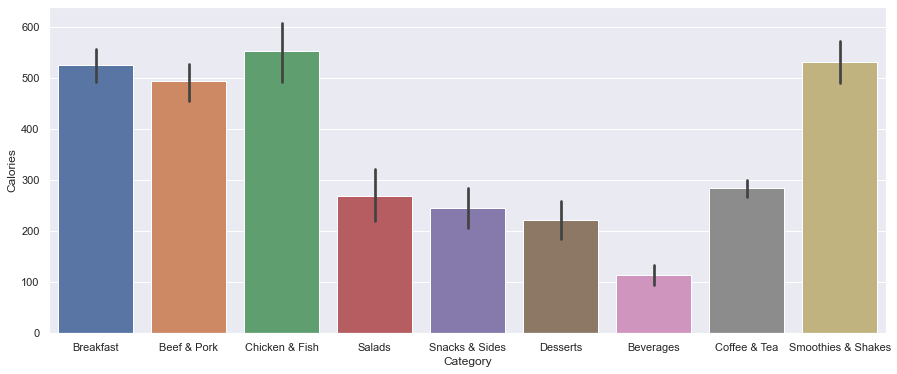

In [175]:
## Examine Categories, Calories and fat


ax = sns.barplot(x="Category", y="Calories", data=mc_data, ci=68)
sns.set(rc = {'figure.figsize':(15,6)})


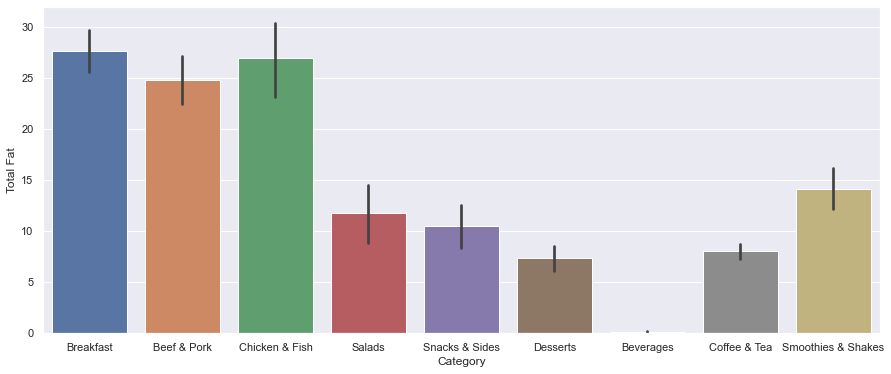

In [176]:
## Examine Categories, Calories and fat

ax = sns.barplot(x="Category", y="Total Fat", data=mc_data, ci=68)
sns.set(rc = {'figure.figsize':(15,6)})

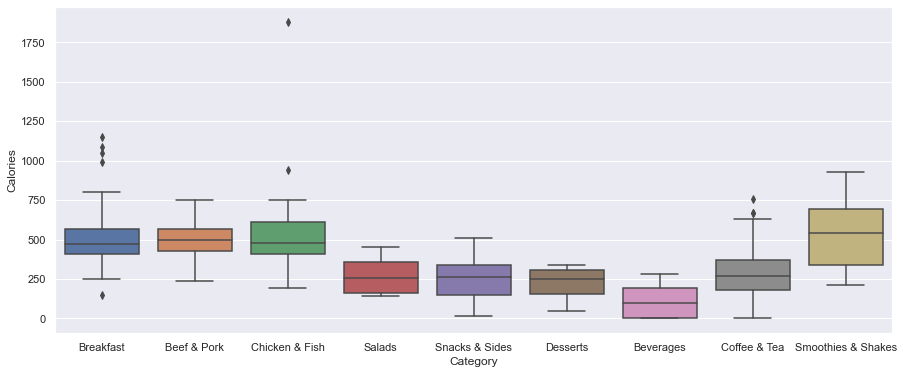

In [177]:
## Boxplots by category

ax = sns.boxplot(x="Category", y="Calories", data=mc_data)

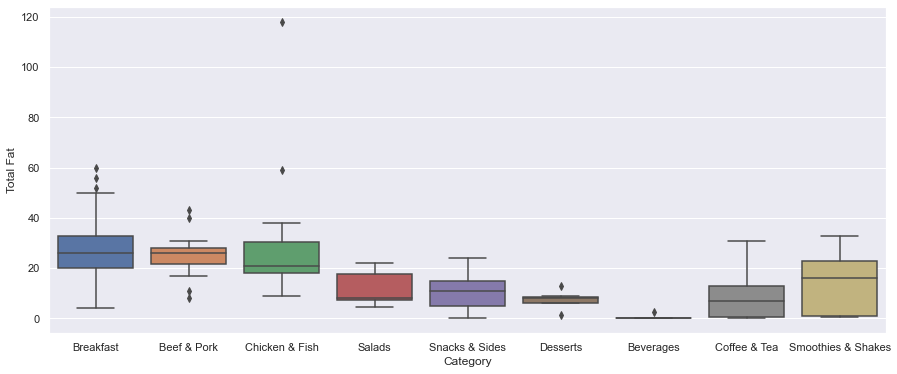

In [178]:
## Boxplots by category

ax = sns.boxplot(x="Category", y="Total Fat", data=mc_data)

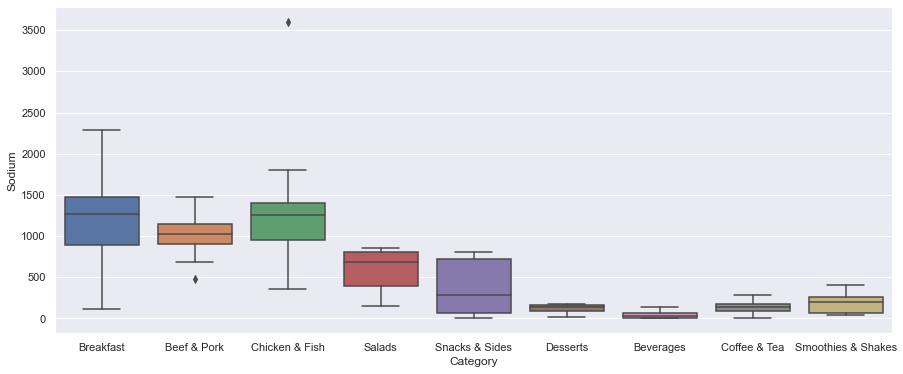

In [179]:
ax = sns.boxplot(x="Category", y="Sodium", data=mc_data)

<AxesSubplot:xlabel='Calories', ylabel='Total Fat'>

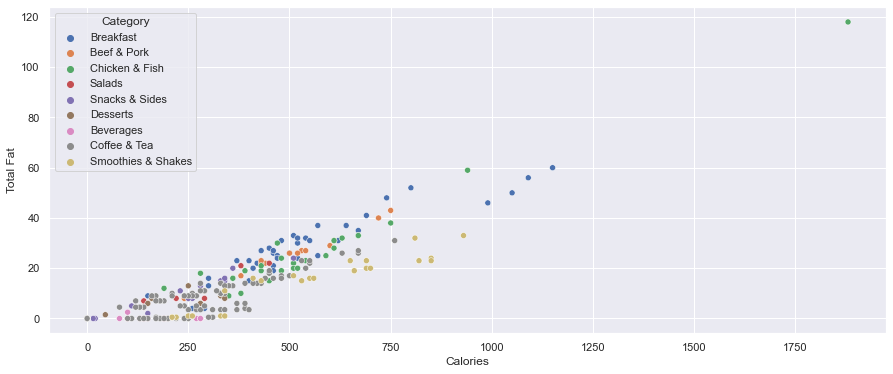

In [180]:
sns.scatterplot(x="Calories", y="Total Fat",hue='Category', data=mc_data)

### discussion

The first impulse of our healthy eater was to consider the fish or chicken or breakfast.  These categories are culinary landmines!  Chicken and Fish and Breakfast optimions are higher in Fat, Sodium, and calories than the beek and pork burgers.

The next option will be to identify the highest and lowest fat items for each category.

In [210]:
### least healthy item by category
#
#  mc_min_max=mc_data.groupby(['Category'])['Calories'].agg(['min','max'])
#
#
## sort and take the first and last rows

In [223]:
mc_data_sorted=mc_data.sort_values(['Category', 'Calories'],ascending=True, axis=0).groupby('Category')


#sorted data
mc_data_sorted.head()

,Category,Item,Calories,Calories from Fat,Total Fat,Trans Fat,Cholesterol,Sodium,Carbohydrates,Dietary Fiber,Sugars,Protein,serving_size_ounces
48,Beef & Pork,Hamburger,240,70,8.0,0.0,30,480,32,1,6,12,3.5980
49,Beef & Pork,Cheeseburger,290,100,11.0,0.5,45,680,33,2,7,15,4113.0000
52,Beef & Pork,McDouble,380,150,17.0,1.0,75,840,34,2,7,22,5.2147
50,Beef & Pork,Double Cheeseburger,430,190,21.0,1.0,90,1040,35,2,7,24,5.7161
54,Beef & Pork,Daily Double,430,200,22.0,1.0,80,760,34,2,7,22,6.7190
114,Beverages,Diet Coke (Small),0,0,0.0,0.0,0,10,0,0,0,0,16.0000
115,Beverages,Diet Coke (Medium),0,0,0.0,0.0,0,20,0,0,0,0,21.0000
116,Beverages,Diet Coke (Large),0,0,0.0,0.0,0,35,0,0,0,0,30.0000
117,Beverages,Diet Coke (Child),0,0,0.0,0.0,0,15,0,0,0,0,12.0000
122,Beverages,Diet Dr Pepper (Small),0,0,0.0,0.0,0,70,0,0,0,2,16.0000


In [224]:
type(mc_data_sorted)


pandas.core.groupby.generic.DataFrameGroupBy

In [228]:

low_calorie= mc_data_sorted.first()
high_calorie= mc_data_sorted.last()


In [233]:
low_calorie.head()

,Item,Calories,Calories from Fat,Total Fat,Trans Fat,Cholesterol,Sodium,Carbohydrates,Dietary Fiber,Sugars,Protein,serving_size_ounces
Category,,,,,,,,,,,,
Beef & Pork,Hamburger,240,70,8.0,0.0,30,480,32,1,6,12,3.598
Beverages,Diet Coke (Small),0,0,0.0,0.0,0,10,0,0,0,0,16.000
Breakfast,Hash Brown,150,80,9.0,0.0,0,310,15,2,0,1,256.000
Chicken & Fish,Chicken McNuggets (4 piece),190,110,12.0,0.0,25,360,12,1,0,9,2.365
Coffee & Tea,Iced Tea (Small),0,0,0.0,0.0,0,10,0,0,0,0,16.000


In [232]:
type(low_calorie)

pandas.core.frame.DataFrame

In [240]:
mc_data_sorted=mc_data.sort_values(['Category', 'Total Fat'],ascending=True, axis=0).groupby('Category')

low_fat= mc_data_sorted.first()
high_fat= mc_data_sorted.last()
low_fat.head()

,Item,Calories,Calories from Fat,Total Fat,Trans Fat,Cholesterol,Sodium,Carbohydrates,Dietary Fiber,Sugars,Protein,serving_size_ounces
Category,,,,,,,,,,,,
Beef & Pork,Hamburger,240,70,8.0,0.0,30,480,32,1,6,12,3.5980
Beverages,Coca-Cola Classic (Small),140,0,0.0,0.0,0,0,39,0,39,0,16.0000
Breakfast,Fruit & Maple Oatmeal,290,35,4.0,0.0,5,160,58,5,32,5,9.6251
Chicken & Fish,Premium Grilled Chicken Classic Sandwich,350,80,9.0,0.0,65,820,42,3,8,28,7200.0000
Coffee & Tea,Iced Tea (Small),0,0,0.0,0.0,0,10,0,0,0,0,16.0000


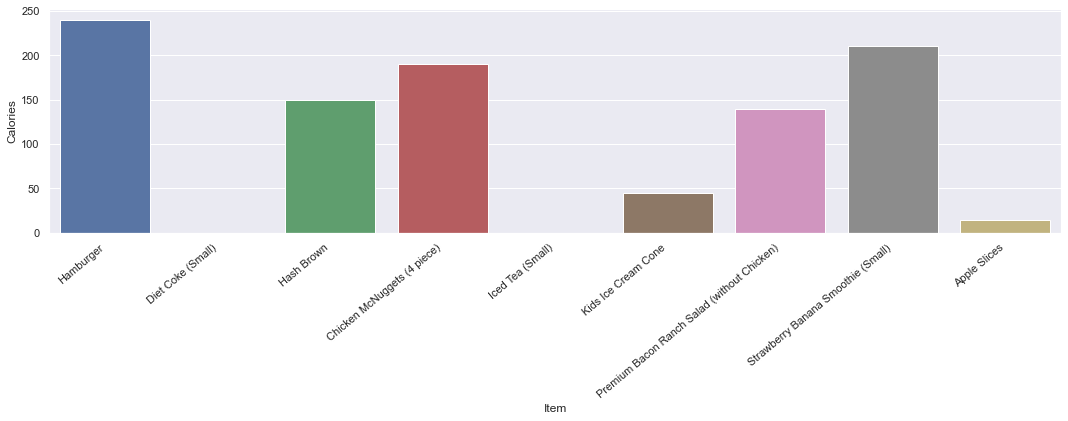

In [237]:
ax = sns.barplot(x="Item", y="Calories", data=low_calorie, ci=68)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

plt.tight_layout()
sns.set(rc = {'figure.figsize':(15,6)})

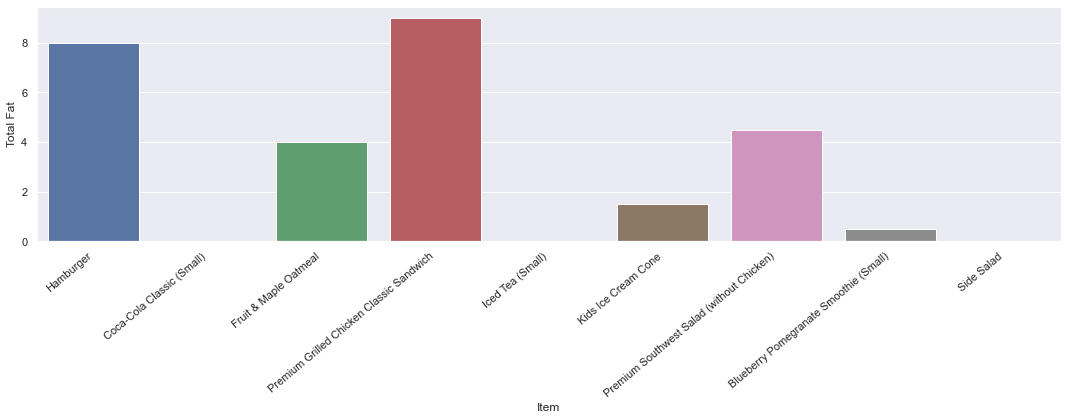

In [242]:
ax = sns.barplot(x="Item", y="Total Fat", data=low_fat, ci=68)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

plt.tight_layout()
sns.set(rc = {'figure.figsize':(15,6)})

In [243]:
#ax = sns.barplot(x="Item", y="Calories", data=high_calorie, ci=68)
#ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
#
#plt.tight_layout()
#sns.set(rc = {'figure.figsize':(15,6)})

### Conclusion
The lowest-calorie option and lowest-fat items in each category are not always the same. It makes sense that hash browns are low calorie but not low in fat. In general as seen in the crossplot, the calories and total fat are highly correlated.
Our "healthy eater" will be able to choose from these options to select the least caloric or lowest fat option in each category.